In [10]:
import numpy as np
import h5py
from nbodykit.lab import *
import nbodykit 
import matplotlib.pyplot as plt
import scipy.stats

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 22
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) 

In [56]:
def delta_stats(filename, L_side=0):
    print(filename)
    f = h5py.File(filename, 'r')
    divergence = f['divergence'][...]
    f.close()

    cosmo = cosmology.Planck15    
    f = cosmo.scale_independent_growth_rate(0.0)
    
    delta = -divergence/(100 * cosmo.h)
    delta_std = np.std(delta)
    delta_skew = scipy.stats.skew(delta.flatten())
    delta_mean = np.mean(delta)
    return {'mean':delta_mean, 'std': delta_std, 'skew':delta_skew}

In [57]:
path = "/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/"
stats = {}
sigmas = [1.0, 3.0, 5.0, 7.0, 10.0]
for sigma in sigmas:
    filename = "velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_{:.1f}_nside_360.hdf5".format(sigma)
    stats["300_{:.1f}".format(sigma)] = delta_stats(path+filename, L_side=720.0)

/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_1.0_nside_360.hdf5
/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_3.0_nside_360.hdf5
/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_5.0_nside_360.hdf5
/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_7.0_nside_360.hdf5
/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_10.0_nside_360.hdf5


In [58]:
path = "/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/"
vels = [125.0, 180.0, 300.0]
for vel in vels:
    filename = "velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_{:.1f}_sigma_3.0_nside_360.hdf5".format(vel)
    stats["{}_3.0".format(int(vel))] = delta_stats(path+filename, L_side=720.0)

/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_125.0_sigma_3.0_nside_360.hdf5
/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_180.0_sigma_3.0_nside_360.hdf5
/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_3.0_nside_360.hdf5


In [59]:
path = "/Users/forero/github/WatershedAbacus/nb/"
sigmas = [1.0, 3.0, 5.0, 7.0, 10.0]
for sigma in sigmas:
    filename = "mock_divergence_mesh_360_box_720_slim_{}.h5".format(int(2.0*sigma))
    stats["mock_720_{:.1f}".format(sigma)] = delta_stats(path+filename, L_side=720.0)

/Users/forero/github/WatershedAbacus/nb/mock_divergence_mesh_360_box_720_slim_2.h5
/Users/forero/github/WatershedAbacus/nb/mock_divergence_mesh_360_box_720_slim_6.h5
/Users/forero/github/WatershedAbacus/nb/mock_divergence_mesh_360_box_720_slim_10.h5
/Users/forero/github/WatershedAbacus/nb/mock_divergence_mesh_360_box_720_slim_14.h5
/Users/forero/github/WatershedAbacus/nb/mock_divergence_mesh_360_box_720_slim_20.h5


In [61]:
std_mock = []
std_sim = []
mean_sim = [] 
man_mock = []
sigmas = [1.0, 3.0, 5.0, 7.0, 10.0]
for sigma in sigmas:
    std_mock.append(stats["mock_720_{:.1f}".format(sigma)]["std"])
    std_sim.append(stats["300_{:.1f}".format(sigma)]["std"])
std_mock = np.array(std_mock)
std_sim = np.array(std_sim)

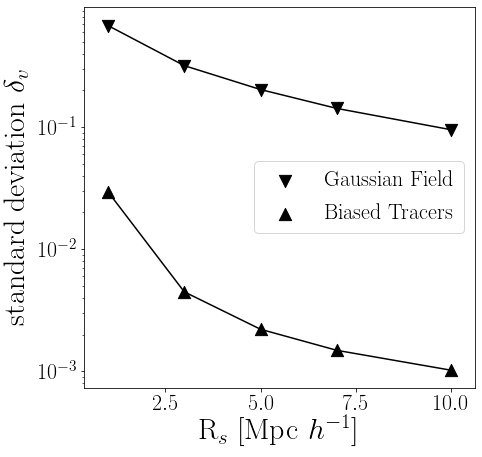

In [62]:
plt.figure(figsize=(7,7))

plt.scatter(sigmas, std_mock, marker="v", s=150, label="Gaussian Field", color='black')
plt.plot(sigmas, std_mock, color='black')

plt.scatter(sigmas, std_sim, marker="^", s=150, label="Biased Tracers", color='black')
plt.plot(sigmas, std_sim, color='black')

plt.semilogy()
plt.legend(fontsize=SMALL_SIZE)
plt.xlabel(r"R$_s$ [$\mathrm{Mpc}\ h^{-1}$]")
plt.ylabel(r"standard deviation $\delta_v$")
plt.savefig("std_delta.pdf", bbox_inches='tight')

In [63]:
stats

{'300_1.0': {'mean': -4.1176481520305445e-20,
  'std': 0.029509640596443554,
  'skew': 2.0443663055810237},
 '300_3.0': {'mean': -3.524653515249447e-20,
  'std': 0.004479192576096131,
  'skew': 3.152878268499766},
 '300_5.0': {'mean': -1.0918525647698191e-19,
  'std': 0.002212174275774047,
  'skew': 2.813659085167032},
 '300_7.0': {'mean': 1.1660006902999115e-21,
  'std': 0.0014877960091639587,
  'skew': 2.5321504177652123},
 '300_10.0': {'mean': 4.6892264496020523e-20,
  'std': 0.0010220624901122594,
  'skew': 2.2675194198055535},
 '125_3.0': {'mean': -6.225396665173503e-19,
  'std': 0.031583024996478755,
  'skew': 2.985980600662713},
 '180_3.0': {'mean': 3.02684260828875e-19,
  'std': 0.014633445063372715,
  'skew': 3.134177721951568},
 'mock_720_1.0': {'mean': -1.2695708e-08,
  'std': 0.67791057,
  'skew': -0.0012943472247570753},
 'mock_720_3.0': {'mean': 3.682406e-09,
  'std': 0.31847373,
  'skew': -0.010126386769115925},
 'mock_720_5.0': {'mean': 1.4301844e-09,
  'std': 0.2029150